<img src="newlogomioti.png" style="height: 100px">   
<br />
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S3: Estrategias de inversión utilizando detección de anomalías

Este challenge tiene por objetivo explorar el uso de técnicas de detección de anomalías sobre estrategias de inversión en el mercado de valores

## Objetivos

El objetivo de este challenge es utilizar técnicas de detección de anomalías para validar una posible estrategia de inversión en el mercado de valores.

Las hipótesis de partida son las siguientes:
- Mediante la detección de anomalías identificamos una serie de fechas clave donde el precio del valor se comporta de forma anómala.
- Si la anomalía es de tipo 'techo' parece que durante los días siguientes el precio del valor cae.
- Si la anomalía es de tipo 'suelo' parece que el precio del valor sube en los días inmediatemente siguientes (3-5 días)

Se trata de determinar para los valores seleccionados si dicha estrategia de inversión nos podría generar buenos resultados. La forma de validarlo es realizar backtesting, es decir revisar los resultados obtenidos en el caso de haber implementado dicha estrategia durante el último año.


Los valores seleccionados son los siguientes:

* Tesla: 'TSLA'
* IAG: 'IAG.MC'
* Santander: 'SAN.MC'
* Intel: 'INTC'
* Ence: 'ENC.MC'
* Alphabet-Google: 'GOOGL'
* Iberdrola: 'IBE.MC'
* Telefónica: 'TEF.MC'
* Facebook: 'FB'


A continuación indico los tickers que hemos seleccionado aunque este objeto no lo voy a utilizar mas adelante, es solo por tenerlo anotado y si necesitamos revisarlo

In [1]:
assets=['FB','TEF.MC','IBE.MC','GOOGL','ENC.MC','INTC','SAN.MC','IAG.MC','TSLA']

El objetivo es trabajar con datos desde el 1 de Enero de 2019 hasta el 21 de Febrero de 2020 (periodo pre-Covid). Tenlo en cuenta porque tienes información adicional en los datos que vas a cargar.

## Configuración del entorno

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 8.0)
import sklearn

## Cargamos los datos de los valores seleccionados

En primer lugar, cargamos los datos del fichero "historico_desde_2019_challenge_s3_plus.pkl". El formato pickle es un formato especial donde además de tener los datos cargados también tenemos la estructura del DataFrame. Este DataFrame también es un tanto particular porque es un "Multiindice"

In [3]:
df=pd.read_pickle("historico_desde_2019_challenge_s3_plus.pkl")

Y empezamos a explorar la información disponible

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 2018-12-31 to 2020-06-08
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, ENC.MC)  366 non-null    float64
 1   (Adj Close, FB)      361 non-null    float64
 2   (Adj Close, GOOGL)   361 non-null    float64
 3   (Adj Close, IAG.MC)  366 non-null    float64
 4   (Adj Close, IBE.MC)  366 non-null    float64
 5   (Adj Close, INTC)    361 non-null    float64
 6   (Adj Close, SAN.MC)  366 non-null    float64
 7   (Adj Close, TEF.MC)  366 non-null    float64
 8   (Adj Close, TSLA)    361 non-null    float64
 9   (Close, ENC.MC)      366 non-null    float64
 10  (Close, FB)          361 non-null    float64
 11  (Close, GOOGL)       361 non-null    float64
 12  (Close, IAG.MC)      366 non-null    float64
 13  (Close, IBE.MC)      366 non-null    float64
 14  (Close, INTC)        361 non-null    float64
 15  (Close, SAN.MC)      

In [5]:
df.tail()

Adj Close                                                     \
              ENC.MC          FB        GOOGL IAG.MC  IBE.MC       INTC   
Date                                                                      
2020-06-02     2.799  232.720001  1442.310059  2.809   9.932  62.119999   
2020-06-03     3.013  230.160004  1439.250000  3.129  10.115  61.930000   
2020-06-04     3.063  226.289993  1414.300049  3.199   9.958  62.970001   
2020-06-05     3.095  230.770004  1440.020020  3.675  10.030  64.339996   
2020-06-08     3.196         NaN          NaN  3.906  10.085        NaN   

                                       Close  ...        Open     Volume  \
            SAN.MC TEF.MC        TSLA ENC.MC  ...        TSLA     ENC.MC   
Date                                          ...                          
2020-06-02  2.1635  4.460  881.559998  2.799  ...  894.700012  3535211.0   
2020-06-03  2.2325  4.658  882.960022  3.013  ...  888.119995  2878807.0   
2020-06-04  2.2695  4.643  864.380005  3.063  ...  889.880005  2716800.0   
2020-06-05  2.5270  4.866  885.659973  3.095  ...  877.840027  2430224.0   
2020-06-08  2.5895  4.982         NaN  3.196  ...         NaN  1197300.0   

                                                                       \
                    FB      GOOGL      IAG.MC      IBE.MC        INTC   
Date                                                                    
2020-06-02  20919000.0  1172100.0  17937048.0  16812450.0  20702400.0   
2020-06-03  15380300.0  1386600.0  33037956.0  17010750.0  16737300.0   
2020-06-04  17041500.0  1349100.0  42679675.0  21867617.0  22010100.0   
2020-06-05  16727200.0  2132100.0  44964309.0  18420683.0  26809000.0   
2020-06-08         NaN        NaN  30452173.0   3853740.0         NaN   

                                                 
                 SAN.MC      TEF.MC        TSLA  
Date                                             
2020-06-02   86595536.0  28196098.0  13565600.0  
2020-06-03   99945871.0  26220913.0   7949500.0  
2020-06-04  149170528.0  36964916.0   8887700.0  
2020-06-05  171612196.0  28721798.0   7796100.0  
2020-06-08   72922882.0  10328403.0         NaN  

[5 rows x 54 columns]

Y si quisieramos ver todas la columnas relativas a los precios de cierre por ejemplo (Close), escribiríamos:

In [6]:
df['Close'].columns

Index(['ENC.MC', 'FB', 'GOOGL', 'IAG.MC', 'IBE.MC', 'INTC', 'SAN.MC', 'TEF.MC',
       'TSLA'],
      dtype='object')

También podemos ver que el dataframe ya está indexado por fecha para facilitar el trabajo posterior.

In [7]:
df.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08'],
              dtype='datetime64[ns]', name='Date', length=372, freq=None)

## Algunas cuestiones a resolver:

### ¿Coinciden las fechas de las anomalías entre los diferentes valores?


In [8]:
# Revisamos las columnas que contienen el valor de cierre de cada uno de los titulos
df['Close'].columns

Index(['ENC.MC', 'FB', 'GOOGL', 'IAG.MC', 'IBE.MC', 'INTC', 'SAN.MC', 'TEF.MC',
       'TSLA'],
      dtype='object')

In [9]:
#Seleccionamos las accione sobre las que queremos realizar el estudido.
df_MC=df['Close'].loc[:,['ENC.MC','IAG.MC','IBE.MC','SAN.MC', 'TEF.MC']]

In [10]:
#Obtenemos el periodo de tiempo propuesto, del 01 de Enero de 2019 al 21 de Febrero de 2020
df_MC=df_MC['2019-01-01':'2020-02-21']
df_MC

,ENC.MC,IAG.MC,IBE.MC,SAN.MC,TEF.MC
Date,,,,,
2019-01-02,5.460,6.684,6.998,3.9775,7.406
2019-01-03,5.320,6.462,7.010,4.0095,7.529
2019-01-04,5.640,6.598,7.062,4.1595,7.627
2019-01-07,5.650,6.646,7.116,4.1830,7.696
2019-01-08,5.705,6.648,7.090,4.2175,7.684
...,...,...,...,...,...
2020-02-17,3.764,7.694,11.060,3.9530,6.383
2020-02-18,3.702,7.600,11.115,3.8960,6.531
2020-02-19,3.708,7.712,11.220,3.9170,6.540


In [11]:
#Revisamos los valores para detectar tipos y si hay algún nulo.
df_MC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 2019-01-02 to 2020-02-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ENC.MC  293 non-null    float64
 1   IAG.MC  293 non-null    float64
 2   IBE.MC  293 non-null    float64
 3   SAN.MC  293 non-null    float64
 4   TEF.MC  293 non-null    float64
dtypes: float64(5)
memory usage: 13.9 KB


In [12]:
#Borramos los 3 nulos que hay
df_MC=df_MC.dropna(axis=0)
df_MC

,ENC.MC,IAG.MC,IBE.MC,SAN.MC,TEF.MC
Date,,,,,
2019-01-02,5.460,6.684,6.998,3.9775,7.406
2019-01-03,5.320,6.462,7.010,4.0095,7.529
2019-01-04,5.640,6.598,7.062,4.1595,7.627
2019-01-07,5.650,6.646,7.116,4.1830,7.696
2019-01-08,5.705,6.648,7.090,4.2175,7.684
...,...,...,...,...,...
2020-02-17,3.764,7.694,11.060,3.9530,6.383
2020-02-18,3.702,7.600,11.115,3.8960,6.531
2020-02-19,3.708,7.712,11.220,3.9170,6.540


In [13]:
lista_acciones=['ENC.MC','IAG.MC','IBE.MC','SAN.MC', 'TEF.MC']

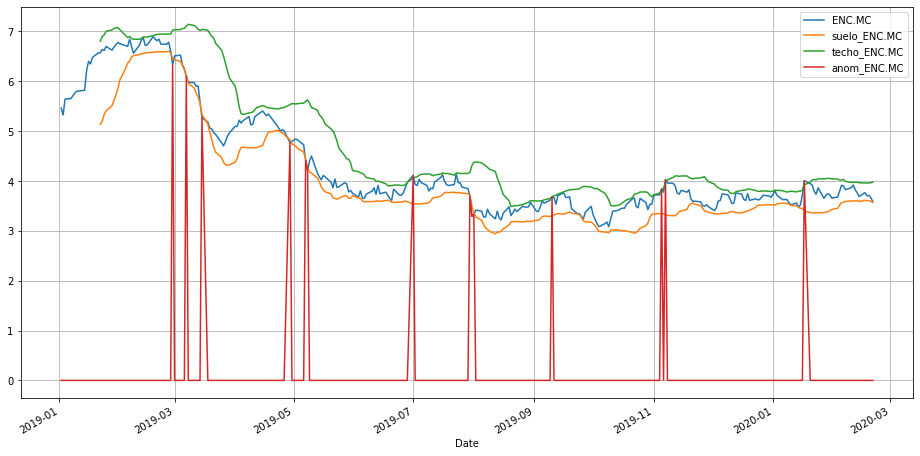

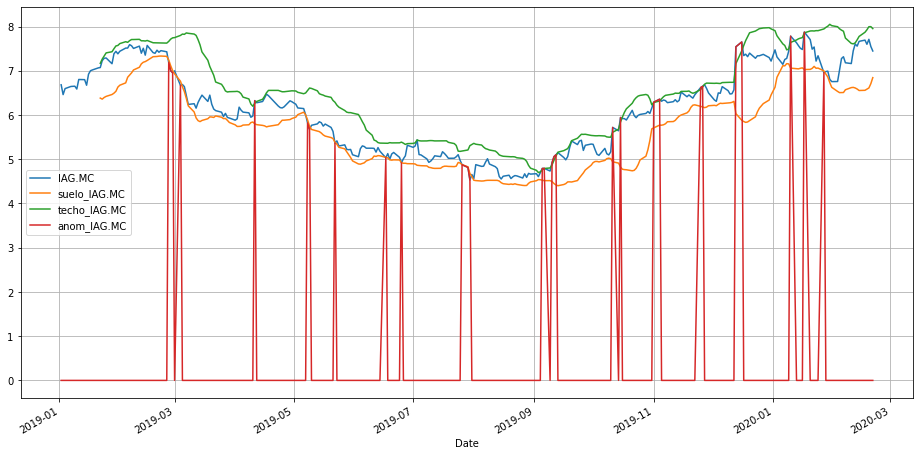

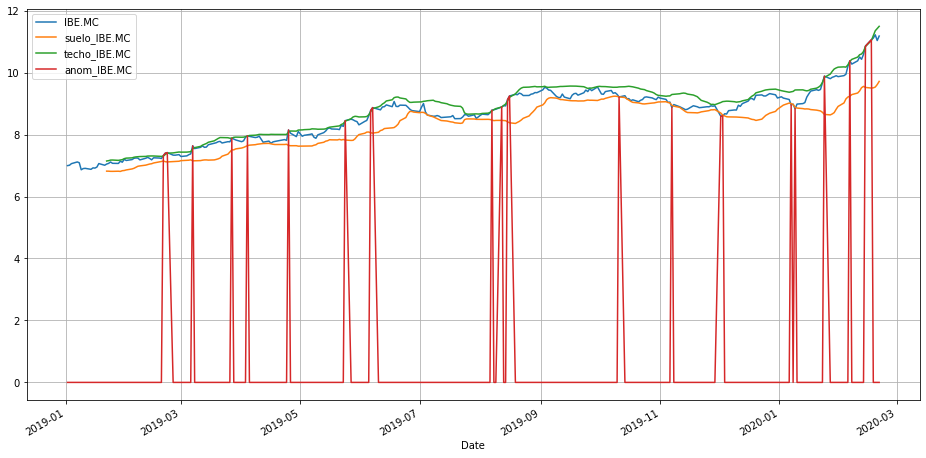

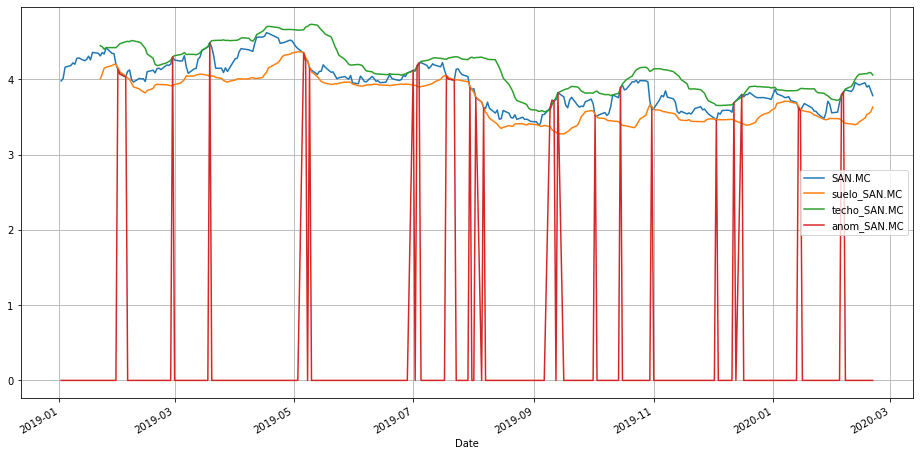

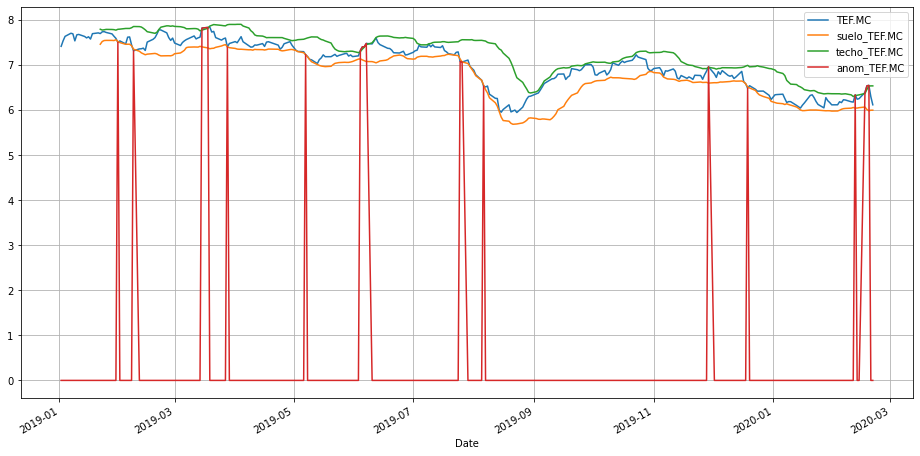

In [14]:
wind = 15
sigma = 2.0
columns = df_MC.columns

for column in lista_acciones:
    
    suelo='suelo_'+column
    techo='techo_'+column
    
    df_MC[suelo] = df_MC[column].rolling(window=wind)\
        .mean() - (sigma * df_MC[column].rolling(window=wind).std())

    df_MC[techo] = df_MC[column].rolling(window=wind)\
        .mean() + (sigma * df_MC[column].rolling(window=wind).std())
    
#     if( (not('techo_' in column)) & ( not ('suelo_' in column))):

    anom='anom_'+column
    df_MC[anom] = df_MC.apply(lambda row: row[column] if (row[column]<=row[suelo] or row[column]>=row[techo]) else 0, axis=1)    
        
    df_MC[[column,suelo,techo,anom]].plot().grid('gridOn')

In [15]:
df_MC.head(10)

,ENC.MC,IAG.MC,IBE.MC,SAN.MC,TEF.MC,suelo_ENC.MC,techo_ENC.MC,anom_ENC.MC,suelo_IAG.MC,techo_IAG.MC,anom_IAG.MC,suelo_IBE.MC,techo_IBE.MC,anom_IBE.MC,suelo_SAN.MC,techo_SAN.MC,anom_SAN.MC,suelo_TEF.MC,techo_TEF.MC,anom_TEF.MC
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,5.460,6.684,6.998,3.9775,7.406,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2019-01-03,5.320,6.462,7.010,4.0095,7.529,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2019-01-04,5.640,6.598,7.062,4.1595,7.627,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2019-01-07,5.650,6.646,7.116,4.1830,7.696,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2019-01-08,5.705,6.648,7.090,4.2175,7.684,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2019-01-09,5.760,6.652,6.864,4.1995,7.527,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2019-01-10,5.800,6.588,6.902,4.2755,7.661,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2019-01-11,5.800,6.804,6.910,4.2830,7.670,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2019-01-14,5.815,6.800,6.878,4.2455,7.625,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


In [16]:
# Una vez visualizada la gráfica con la cotización, los suelos, techos y anomalías, vamos a consultar la fecha de las anomalís para tener los dias concretos

df_amomalias_ENC=df_MC[df_MC['anom_ENC.MC']>0].loc[:,['ENC.MC','techo_ENC.MC','suelo_ENC.MC','anom_ENC.MC']]

In [17]:
df_amomalias_SAN=df_MC[df_MC['anom_SAN.MC']>0].loc[:,['SAN.MC','techo_SAN.MC','suelo_SAN.MC','anom_SAN.MC']]

In [18]:
df_amomalias_IBE=df_MC[df_MC['anom_IBE.MC']>0].loc[:,['IBE.MC','techo_IBE.MC','suelo_IBE.MC','anom_IBE.MC']]

In [19]:
df_amomalias_IAG=df_MC[df_MC['anom_IAG.MC']>0].loc[:,['IAG.MC','techo_IAG.MC','suelo_IAG.MC','anom_IAG.MC']]

In [20]:
df_amomalias_TEF=df_MC[df_MC['anom_TEF.MC']>0].loc[:,['TEF.MC','techo_TEF.MC','suelo_TEF.MC','anom_TEF.MC']]
# df_MC.loc[:,['ENC.MC','techo_ENC.MC','suelo_ENC.MC','anom_ENC.MC']]

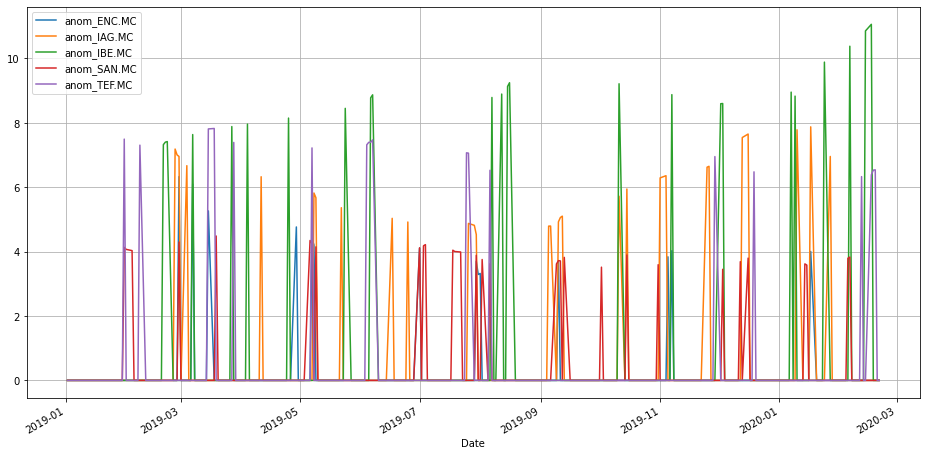

In [21]:
#Visualizamos el calendario de cada una de las anomalías de cada uno de los valores
df_MC[['anom_ENC.MC','anom_IAG.MC','anom_IBE.MC','anom_SAN.MC','anom_TEF.MC']].plot().grid('gridOn')

  * Aunque alguna anomalía coinciden en el tiempo, no se observa que haya un patrón común en el que coincidan las anomalías de los distintos valores.


### ¿El comportamiento en los días siguientes a la anomalía es el esperado? ¿Durante cuantos días? ¿en qué porcentaje de las ocasiones se produce el comportamiento esperado?

* Consideraciones:
    - Consideramos comportamiento esperado aquel que a partir del 3º día de una anomalía de suelo empieza a subir el valor.
    - Consideramos comportamiento esperado aquel que a partir del 1º día de una anomalía de techo empieza a bajar el valor.
    - Para el calculo de los días extraemos la medía de los días de aquellos comportamientos esperados.

In [22]:
def determina_anomalia_esperada(row,accion):
        
    suelo='suelo_'+accion
    techo='techo_'+accion
    anomalia='anom_'+accion
    cotiza_a_3_dias='shift_3_'+accion
    cotiza_a_1_dia='shift_1_'+accion
    

    if(row[anomalia]>0): # Es anomalia

        if(row[anomalia]<=row[suelo]): # Anomalia suelo
            row['tipo_anom_'+accion]='S'
            if(row[anomalia]<=row[cotiza_a_3_dias]): # Como esperamos al 3 día ya sube
                row['comportamiento_anom_'+accion]='E'
            else:
                row['comportamiento_anom_'+accion]='A'
        else: # Es anomalía techo    
                row['tipo_anom_'+accion]='T'
                if(row[anomalia]>=row[cotiza_a_1_dia]): #Como esperamos al dia siguiente baja
                    row['comportamiento_anom_'+accion]='E'
                else:
                    row['comportamiento_anom_'+accion]='A'
            
    return row


In [23]:
def calcula_dias(df,accion):

    dias_anomalia=0 
    anom='anom_'+accion 
    comportamiento='comportamiento_anom_'+accion
    tipo='tipo_anom_'+accion
    
    fecha_anomalia=0
    valor_anomalia=0
    tipo_anomalia=''
    
    df_anom_esperado=df[(df[anom]>0)&(df[comportamiento]=='E')]
    
    for index1,fila1 in df_anom_esperado.iterrows():
        
            fecha_anomalia=index1
            valor_anomalia=fila1[accion]
            tipo_anomalia=fila1[tipo]
            dias_gap_anomalia_suelo=3 # Inicializo a 3 por considerar que son los 3 días que espero en una suelo
            # para ver si la tendencia es al alza y empezar a contar los días que permanece la tendencia prevista
            for index2,fila2 in df.iterrows():
            
                
                if(tipo_anomalia=='S'):
                    if((index2-fecha_anomalia)>=pd.Timedelta(1, unit='d')):
                        
                    # Para las anomalias de suelo, empezamos a contar a partir del día 3 que es cuando
                    # según los requerimientos debería empezar el comportamiento esperado hacia arriba

                        dias_gap_anomalia_suelo-=1
                                
                        if(dias_gap_anomalia_suelo<=0):
                            if((valor_anomalia<=fila2[accion])):
                                # Si el valor de la acción sigue siendo mayor.
                                dias_anomalia+=1
                            else: # Se termina el comortamiento de subida y por lo tanto el comportamiento normal.
    #                          
                                df.loc[fecha_anomalia,'dias_tendencia_'+accion]=dias_anomalia
                                dias_anomalia=0
                                dias_gap_anomalia_suelo=3
                                break

                elif(tipo_anomalia=='T'):

                    if((index2-fecha_anomalia)>=pd.Timedelta(1, unit='d')):
                        if((valor_anomalia>=fila2[accion])):
                            # Si el valor de la acción sigue siendo menor.
                            dias_anomalia+=1
                        else: # Se termina el comortamiento de bajada y por lo tanto el comportamiento normal.
#                             print(dias_anomalia)
                            df.loc[fecha_anomalia,'dias_tendencia_'+accion]=dias_anomalia
                            dias_anomalia=0
                            break
            
                # Para las tendencias que siguen una vez acabado el df
                df.loc[fecha_anomalia,'dias_anomalia_'+accion]=dias_anomalia

    return df

In [24]:
def analisis_cartera(df,valores):
    informe = []
    
    for valor in valores: # bucle que nos recorre los valores que queremos analizar
    
        # Construcción de las distintas columnas que vamos a utilizar
        suelo='suelo_'+valor
        techo='techo_'+valor
        anom='anom_'+valor
        
        # Guarda la cotización de 3 días a futuro que nos servirá para las anomalias suelo considerarlas que tienen
        # comportamiento esperado si apartir de ese día el valor va al alza
        cotiza_a_3_dias='shift_3_'+valor 
        
        # Guarda la cotización de 1 días a futuro que nos servirá para las anomalias techo considerarlas que tienen
        # comportamiento esperado si apartir de ese día el valor va a la baja
        cotiza_a_1_dia='shift_1_'+valor
        
        #Guarda el si el comportamiento de la anomalia es esperado 'E' o anómalo 'A'
        comportamiento='comportamiento_anom_'+valor
        
        #Guarda el tipo de la anomalía si es 'S' suelo y si es 'T' techo
        tipo='tipo_anom_'+valor
        
        # Guarda el número de días que dura una tendencia, despues de una anomalia, cuando esta tiene comportamiento esperado
        dias='dias_tendencia_'+valor
                
        df_aux=df.loc[:,[valor,techo,suelo,anom]].dropna()
        
        df_aux[cotiza_a_3_dias]=df_aux[valor].shift(-3) 
        df_aux[cotiza_a_1_dia]=df_aux[valor].shift(-1) 
        
        df_aux[[tipo,comportamiento]]=np.nan
        
        df_aux=df_aux.apply(determina_anomalia_esperada,accion=valor,axis=1)
        df_aux=calcula_dias(df_aux,valor)
        
        df_aux=df_aux[(df_aux[anom]>0)]
        
        #Generamos respuestas a las preguntas apartado 2
        comportamientos_esperados= df_aux[(df_aux[comportamiento]=='E')].loc[:,comportamiento].count()
        porcentaje_esperados = (comportamientos_esperados/df_aux[comportamiento].count())*100
        dias_tendencias=df_aux[(df_aux[comportamiento]=='E')].loc[:,dias].mean()
        print('Respuesta apartado 2 para el valor :',valor)
        print('Número de tendencias para ',valor,' con comportamiento esperado : ', comportamientos_esperados)
        print('Porcentaje de tendencias para ',valor,' con comportamiento esperado : ', porcentaje_esperados,'%')
        print('Media de días que dura una tendencia para ',valor,' : ', dias_tendencias)
        print('\n')
        
      
        df_aux=df_aux.loc[:,[valor,techo,suelo,anom,tipo,comportamiento,dias]]
        informe.append(df_aux)
        
    return informe

In [25]:
lista_acciones=['ENC.MC','IAG.MC','IBE.MC','SAN.MC', 'TEF.MC']
informe_cartera=analisis_cartera(df_MC,lista_acciones)

Respuesta apartado 2 para el valor : ENC.MC
Número de tendencias para  ENC.MC  con comportamiento esperado :  8
Porcentaje de tendencias para  ENC.MC  con comportamiento esperado :  57.14285714285714 %
Media de días que dura una tendencia para  ENC.MC  :  2.6666666666666665


Respuesta apartado 2 para el valor : IAG.MC
Número de tendencias para  IAG.MC  con comportamiento esperado :  12
Porcentaje de tendencias para  IAG.MC  con comportamiento esperado :  41.37931034482759 %
Media de días que dura una tendencia para  IAG.MC  :  20.7


Respuesta apartado 2 para el valor : IBE.MC
Número de tendencias para  IBE.MC  con comportamiento esperado :  12
Porcentaje de tendencias para  IBE.MC  con comportamiento esperado :  50.0 %
Media de días que dura una tendencia para  IBE.MC  :  27.125


Respuesta apartado 2 para el valor : SAN.MC
Número de tendencias para  SAN.MC  con comportamiento esperado :  15
Porcentaje de tendencias para  SAN.MC  con comportamiento esperado :  48.38709677419355 %
Med

* Informes a partir de los que se han realizado los cálculos.
    - tipo: S- Suelo y T- Techo
    - comportamiento: A - Anomalo y E - Esperado.
    - dias: Dias de duración de comportamiento esperado.

In [26]:
 informe_cartera[0]

,ENC.MC,techo_ENC.MC,suelo_ENC.MC,anom_ENC.MC,tipo_anom_ENC.MC,comportamiento_anom_ENC.MC,dias_tendencia_ENC.MC
Date,,,,,,,
2019-02-28,6.330,7.021058,6.442942,6.330,S,A,NaN
2019-03-07,6.095,7.099530,6.099803,6.095,S,A,NaN
2019-03-15,5.265,7.037407,5.328593,5.265,S,A,NaN
2019-04-29,4.766,5.527176,4.822291,4.766,S,E,1.0
2019-05-07,4.410,5.590613,4.431387,4.410,S,E,1.0
2019-05-08,4.206,5.623558,4.250575,4.206,S,A,NaN
2019-07-01,4.110,4.058201,3.536466,4.110,T,E,10.0
2019-07-30,3.700,4.167652,3.711814,3.700,S,A,NaN
2019-07-31,3.290,4.307533,3.496467,3.290,S,E,1.0


In [27]:
 informe_cartera[1]

,IAG.MC,techo_IAG.MC,suelo_IAG.MC,anom_IAG.MC,tipo_anom_IAG.MC,comportamiento_anom_IAG.MC,dias_tendencia_IAG.MC
Date,,,,,,,
2019-02-26,7.186,7.665103,7.244764,7.186,S,A,NaN
2019-02-27,7.004,7.716258,7.115209,7.004,S,A,NaN
2019-02-28,6.956,7.745422,7.004711,6.956,S,A,NaN
2019-03-04,6.670,7.799740,6.764527,6.670,S,A,NaN
2019-04-11,6.326,6.265352,5.801315,6.326,T,E,2.0
2019-05-08,5.820,6.553261,5.889139,5.820,S,A,NaN
2019-05-09,5.674,6.610521,5.747612,5.674,S,E,5.0
2019-05-22,5.364,6.289338,5.384262,5.364,S,A,NaN
2019-06-17,5.034,5.364143,5.041190,5.034,S,E,3.0


In [28]:
 informe_cartera[2]

,IBE.MC,techo_IBE.MC,suelo_IBE.MC,anom_IBE.MC,tipo_anom_IBE.MC,comportamiento_anom_IBE.MC,dias_tendencia_IBE.MC
Date,,,,,,,
2019-02-20,7.322,7.305915,7.149018,7.322,T,A,NaN
2019-02-21,7.400,7.357769,7.123831,7.400,T,A,NaN
2019-02-22,7.418,7.398229,7.117237,7.418,T,E,8.0
2019-03-07,7.636,7.540214,7.151787,7.636,T,E,5.0
2019-03-27,7.884,7.882984,7.505816,7.884,T,E,4.0
2019-04-04,7.960,7.951436,7.641098,7.960,T,E,12.0
2019-04-25,8.148,8.088313,7.648487,8.148,T,E,12.0
2019-05-24,8.450,8.433257,7.823276,8.450,T,A,NaN
2019-06-06,8.778,8.733974,8.057493,8.778,T,A,NaN


In [29]:
 informe_cartera[3]

,SAN.MC,techo_SAN.MC,suelo_SAN.MC,anom_SAN.MC,tipo_anom_SAN.MC,comportamiento_anom_SAN.MC,dias_tendencia_SAN.MC
Date,,,,,,,
2019-01-31,4.1320,4.442460,4.155806,4.1320,S,A,NaN
2019-02-01,4.0695,4.471089,4.098711,4.0695,S,E,1.0
2019-02-04,4.0310,4.498119,4.043081,4.0310,S,A,NaN
2019-02-28,4.2960,4.295531,3.910269,4.2960,T,E,3.0
2019-03-19,4.4855,4.485450,4.038216,4.4855,T,E,17.0
2019-05-06,4.3455,4.656715,4.357819,4.3455,S,A,NaN
2019-05-07,4.2495,4.692278,4.291922,4.2495,S,A,NaN
2019-05-09,4.1475,4.723704,4.164296,4.1475,S,A,NaN
2019-07-01,4.1190,4.108015,3.922718,4.1190,T,E,1.0


### Con una inversión de 1000€ durante el año ¿cuanto dinero habríamos ganado o perdido utilizando la estretegia de inversión considerada?


* La estrategia que vamos a seguir es:
    - Si no estamos dentro y viene anomalia suelo damos orden de compra.
    - Entrar a comprar 3 días después, como indica la hipótesis de partida, de dar la orden de compra por una anomalía baja.
    - Si detectamos anomalia techo, dar orden de venta para el día siguiente, tal como indica la hipotésis de partida.
    - Vender el día siguiente a una orden de venta, ya que según indcaciones suele bajar, tal como indica la hipotesis de partida.
    - Tenemos 1000 euros por acción.

In [30]:
def estrategia_inversion_cartera(df,valores,inversion):
    informe = []
    for valor in valores:
    
        suelo='suelo_'+valor
        techo='techo_'+valor
        anom='anom_'+valor
                
        df_aux=df.loc[:,[valor,techo,suelo,anom]]
        df_aux=estrategia_inversion_valor(df_aux,valor,inversion)
        informe.append(df_aux)
        print(df_aux)
    return informe

In [31]:
def estrategia_inversion_valor(df,valor,inversion):
    
    suelo='suelo_'+valor
    techo='techo_'+valor
    anom='anom_'+valor
    
    comportamiento='comportamiento_anom_'+valor
    
    orden_entrar=False # Se activa cuando detectamos un anomalia suelo
    dentro=False# Se activa 3 días depsues de un anomalia suelo cuando hemos comprado
    orden_salir=False# Se activa cuando detectamos un anomalia techo y teniamos acciones compradas.

    fecha_orden_entrar=pd.Timestamp("2019-01-01")
    fecha_orden_salir=pd.Timestamp("2019-01-01")
    acciones=0
    ganancias=0
    ganancias_acum=0
    
   
    
    for index,fila in df.iterrows():

        if ((orden_entrar)& (not dentro)&((index-fecha_orden_entrar)>=pd.Timedelta(3, unit='d'))):
            
            orden_entrar=False #Desactivo orden de entrar  
            dentro= True
            acciones=(inversion/fila[valor])
            df.loc[index,'accion']='Compro'
            df.loc[index,'número']=acciones
            df.loc[index,'importe']=inversion
            
#             print('compro en ',index)
#             print('acciones ',acciones)
            
                
        elif ((orden_salir)&(dentro)&((index-fecha_orden_salir)>=pd.Timedelta(1, unit='d'))):
            
            orden_salir=False #Desactivo orden de salir
            dentro=False
            #importe=fila[accion]*acciones
            
            ganancias=((fila[valor]*acciones)-inversion)
            inversion=fila[valor]*acciones
            ganancias_acum+=ganancias
#             print('vendo en ',index)
#             print('acciones ',acciones)
#             print('ganancias ',ganancias)
            
            df.loc[index,'accion']='Vendo'
            df.loc[index,'número']=acciones
            df.loc[index,'importe']=inversion
            df.loc[index,'ganancias']=ganancias
            df.loc[index,'ganancias_acum']=ganancias_acum
            acciones=0
        
        if ((not orden_entrar)&(not dentro)&(not fila[anom]==0)&(fila[anom]<fila[suelo])):#&(fila[comportamiento]=='E')
            
            orden_entrar=True #Activo orden de entrar  
            fecha_orden_entrar=index
            df.loc[index,'accion']='Orden de compra'
#             print('anoto entrar en ',index)
           
                
        elif ((not orden_salir)&(dentro)&(not fila[anom]==0)&(fila[anom]>fila[techo])):#&(fila[comportamiento]=='E')
           
            orden_salir=True #Activo orden den entrar 
            fecha_orden_entrar=index
            df.loc[index,'accion']='Orden de venta'
#             print('anoto salir en ',index)
         
    
    
            
    lista_fechas_compra=df[(~df['accion'].isna()&(df['accion']=='Compro'))].index
    valores_compra= df[(~df['accion'].isna()&(df['accion']=='Compro'))].loc[:,valor].values
                        
    lista_fechas_venta=df[(~df['accion'].isna()&(df['accion']=='Vendo'))].index
    valores_venta= df[(~df['accion'].isna()&(df['accion']=='Vendo'))].loc[:,valor].values
                        
       
    df.loc[:,[valor,anom]].plot().grid('gridOn')
    plt.scatter(lista_fechas_compra,valores_compra, marker="$c$", color="red",s=150,label='Compra')                           
    plt.scatter(lista_fechas_venta,valores_venta, marker="$v$", color="green",s=150,label='Venta')
    plt.legend(bbox_to_anchor=(1, 0.65))
    plt.show()    
    
    
    return df[(~df['accion'].isna())|(df[anom]>0)]
 

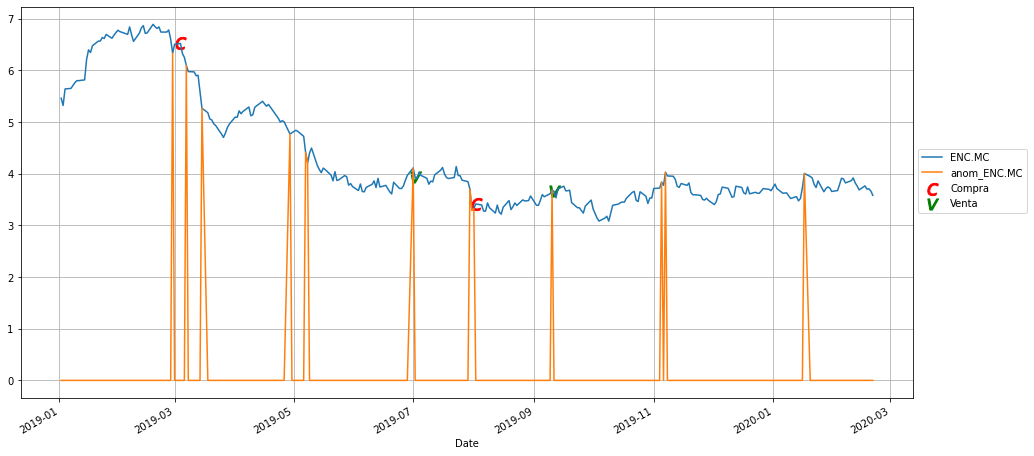

            ENC.MC  techo_ENC.MC  suelo_ENC.MC  anom_ENC.MC           accion  \
Date                                                                           
2019-02-28   6.330      7.021058      6.442942        6.330  Orden de compra   
2019-03-04   6.520      7.033411      6.396589        0.000           Compro   
2019-03-07   6.095      7.099530      6.099803        6.095              NaN   
2019-03-15   5.265      7.037407      5.328593        5.265              NaN   
2019-04-29   4.766      5.527176      4.822291        4.766              NaN   
2019-05-07   4.410      5.590613      4.431387        4.410              NaN   
2019-05-08   4.206      5.623558      4.250575        4.206              NaN   
2019-07-01   4.110      4.058201      3.536466        4.110   Orden de venta   
2019-07-02   3.928      4.069672      3.534061        0.000            Vendo   
2019-07-30   3.700      4.167652      3.711814        3.700  Orden de compra   
2019-07-31   3.290      4.307533      3.

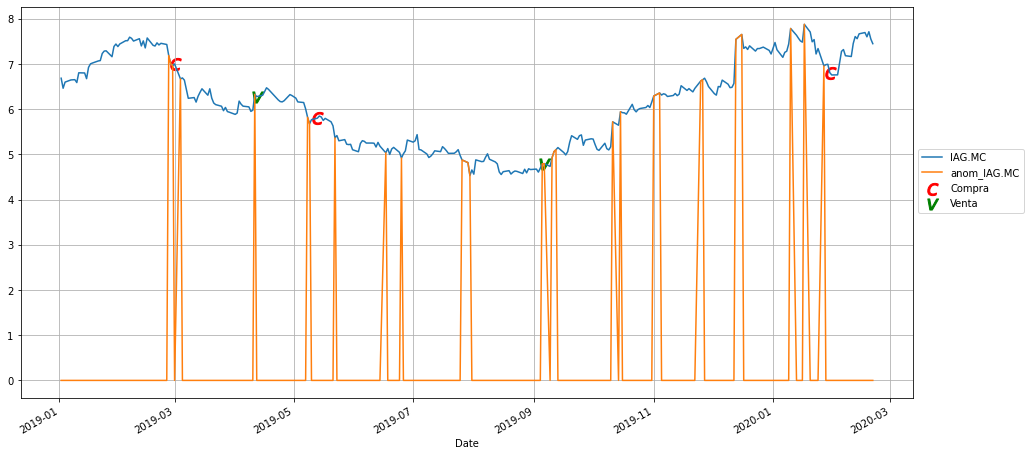

            IAG.MC  techo_IAG.MC  suelo_IAG.MC  anom_IAG.MC           accion  \
Date                                                                           
2019-02-26   7.186      7.665103      7.244764        7.186  Orden de compra   
2019-02-27   7.004      7.716258      7.115209        7.004              NaN   
2019-02-28   6.956      7.745422      7.004711        6.956              NaN   
2019-03-01   7.000      7.750700      6.931967        0.000           Compro   
2019-03-04   6.670      7.799740      6.764527        6.670              NaN   
2019-04-11   6.326      6.265352      5.801315        6.326   Orden de venta   
2019-04-12   6.278      6.307997      5.782403        0.000            Vendo   
2019-05-08   5.820      6.553261      5.889139        5.820  Orden de compra   
2019-05-09   5.674      6.610521      5.747612        5.674              NaN   
2019-05-13   5.800      6.548080      5.638053        0.000           Compro   
2019-05-22   5.364      6.289338      5.

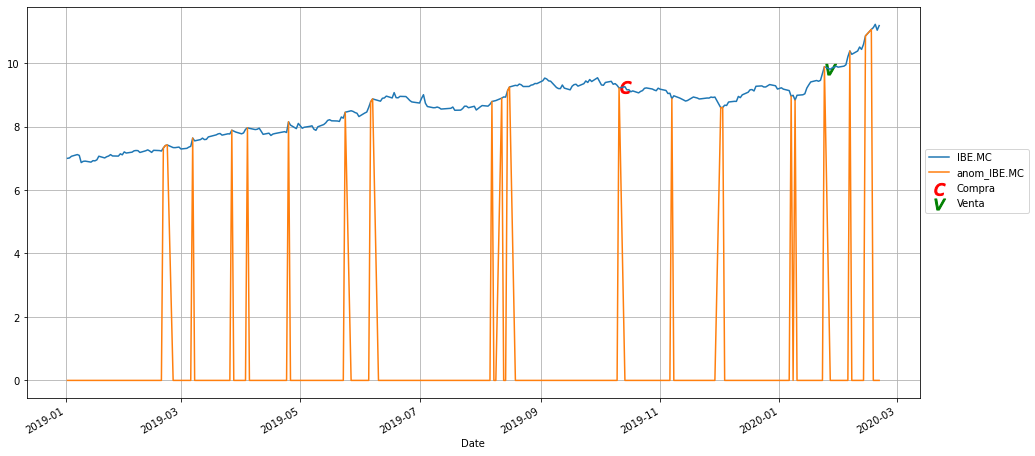

            IBE.MC  techo_IBE.MC  suelo_IBE.MC  anom_IBE.MC           accion  \
Date                                                                           
2019-02-20   7.322      7.305915      7.149018        7.322              NaN   
2019-02-21   7.400      7.357769      7.123831        7.400              NaN   
2019-02-22   7.418      7.398229      7.117237        7.418              NaN   
2019-03-07   7.636      7.540214      7.151787        7.636              NaN   
2019-03-27   7.884      7.882984      7.505816        7.884              NaN   
2019-04-04   7.960      7.951436      7.641098        7.960              NaN   
2019-04-25   8.148      8.088313      7.648487        8.148              NaN   
2019-05-24   8.450      8.433257      7.823276        8.450              NaN   
2019-06-06   8.778      8.733974      8.057493        8.778              NaN   
2019-06-07   8.870      8.837089      8.046378        8.870              NaN   
2019-08-07   8.788      8.761895      8.

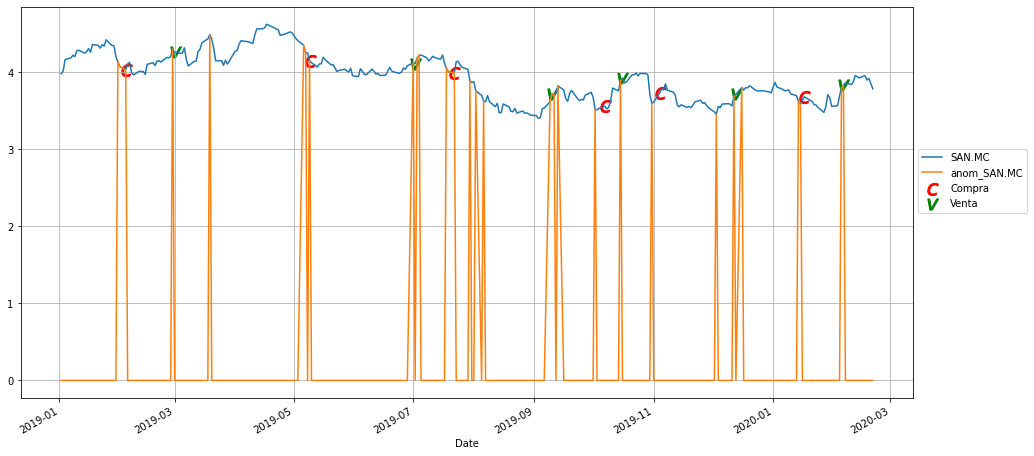

            SAN.MC  techo_SAN.MC  suelo_SAN.MC  anom_SAN.MC           accion  \
Date                                                                           
2019-01-31  4.1320      4.442460      4.155806       4.1320  Orden de compra   
2019-02-01  4.0695      4.471089      4.098711       4.0695              NaN   
2019-02-04  4.0310      4.498119      4.043081       4.0310           Compro   
2019-02-28  4.2960      4.295531      3.910269       4.2960   Orden de venta   
2019-03-01  4.2545      4.313286      3.931381       0.0000            Vendo   
2019-03-19  4.4855      4.485450      4.038216       4.4855              NaN   
2019-05-06  4.3455      4.656715      4.357819       4.3455  Orden de compra   
2019-05-07  4.2495      4.692278      4.291922       4.2495              NaN   
2019-05-09  4.1475      4.723704      4.164296       4.1475           Compro   
2019-07-01  4.1190      4.108015      3.922718       4.1190   Orden de venta   
2019-07-02  4.1080      4.126098      3.

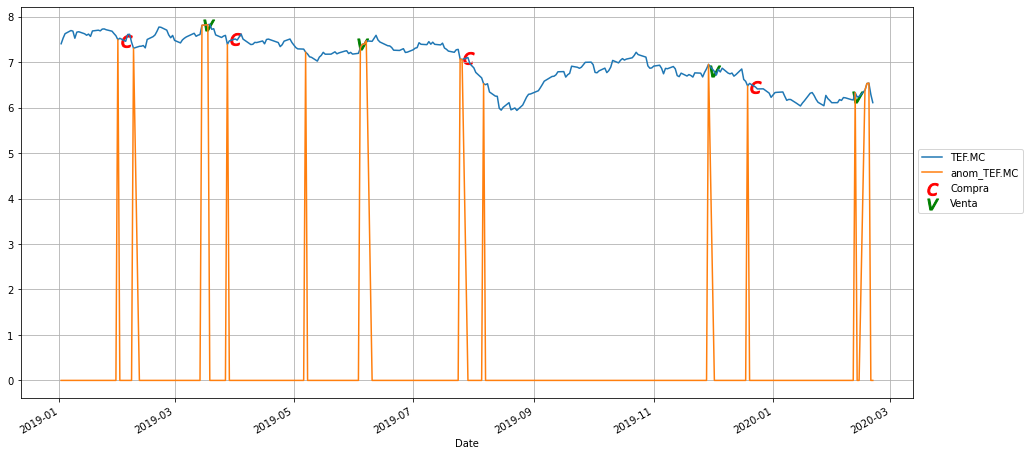

            TEF.MC  techo_TEF.MC  suelo_TEF.MC  anom_TEF.MC           accion  \
Date                                                                           
2019-01-31   7.495      7.783898      7.511568        7.495  Orden de compra   
2019-02-04   7.460      7.802452      7.451815        0.000           Compro   
2019-02-08   7.307      7.845521      7.342479        7.307              NaN   
2019-03-15   7.811      7.766616      7.393918        7.811   Orden de venta   
2019-03-18   7.825      7.805336      7.371197        7.825            Vendo   
2019-03-28   7.392      7.884868      7.396999        7.392  Orden de compra   
2019-04-01   7.511      7.891055      7.359879        0.000           Compro   
2019-05-07   7.221      7.578024      7.221710        7.221              NaN   
2019-06-04   7.317      7.289579      7.127621        7.317   Orden de venta   
2019-06-05   7.394      7.344296      7.105437        7.394            Vendo   
2019-06-06   7.398      7.385883      7.

In [32]:
informe=estrategia_inversion_cartera(df_MC,lista_acciones,1000)

In [33]:
informe[0]

,ENC.MC,techo_ENC.MC,suelo_ENC.MC,anom_ENC.MC,accion,número,importe,ganancias,ganancias_acum
Date,,,,,,,,,
2019-02-28,6.330,7.021058,6.442942,6.330,Orden de compra,NaN,NaN,NaN,NaN
2019-03-04,6.520,7.033411,6.396589,0.000,Compro,153.374234,1000.000000,NaN,NaN
2019-03-07,6.095,7.099530,6.099803,6.095,NaN,NaN,NaN,NaN,NaN
2019-03-15,5.265,7.037407,5.328593,5.265,NaN,NaN,NaN,NaN,NaN
2019-04-29,4.766,5.527176,4.822291,4.766,NaN,NaN,NaN,NaN,NaN
2019-05-07,4.410,5.590613,4.431387,4.410,NaN,NaN,NaN,NaN,NaN
2019-05-08,4.206,5.623558,4.250575,4.206,NaN,NaN,NaN,NaN,NaN
2019-07-01,4.110,4.058201,3.536466,4.110,Orden de venta,NaN,NaN,NaN,NaN
2019-07-02,3.928,4.069672,3.534061,0.000,Vendo,153.374234,602.453985,-397.546015,-397.546015


In [34]:
informe[1]

,IAG.MC,techo_IAG.MC,suelo_IAG.MC,anom_IAG.MC,accion,número,importe,ganancias,ganancias_acum
Date,,,,,,,,,
2019-02-26,7.186,7.665103,7.244764,7.186,Orden de compra,NaN,NaN,NaN,NaN
2019-02-27,7.004,7.716258,7.115209,7.004,NaN,NaN,NaN,NaN,NaN
2019-02-28,6.956,7.745422,7.004711,6.956,NaN,NaN,NaN,NaN,NaN
2019-03-01,7.000,7.750700,6.931967,0.000,Compro,142.857143,1000.000000,NaN,NaN
2019-03-04,6.670,7.799740,6.764527,6.670,NaN,NaN,NaN,NaN,NaN
2019-04-11,6.326,6.265352,5.801315,6.326,Orden de venta,NaN,NaN,NaN,NaN
2019-04-12,6.278,6.307997,5.782403,0.000,Vendo,142.857143,896.857125,-103.142875,-103.142875
2019-05-08,5.820,6.553261,5.889139,5.820,Orden de compra,NaN,NaN,NaN,NaN
2019-05-09,5.674,6.610521,5.747612,5.674,NaN,NaN,NaN,NaN,NaN


In [35]:
informe[2]

,IBE.MC,techo_IBE.MC,suelo_IBE.MC,anom_IBE.MC,accion,número,importe,ganancias,ganancias_acum
Date,,,,,,,,,
2019-02-20,7.322,7.305915,7.149018,7.322,NaN,NaN,NaN,NaN,NaN
2019-02-21,7.400,7.357769,7.123831,7.400,NaN,NaN,NaN,NaN,NaN
2019-02-22,7.418,7.398229,7.117237,7.418,NaN,NaN,NaN,NaN,NaN
2019-03-07,7.636,7.540214,7.151787,7.636,NaN,NaN,NaN,NaN,NaN
2019-03-27,7.884,7.882984,7.505816,7.884,NaN,NaN,NaN,NaN,NaN
2019-04-04,7.960,7.951436,7.641098,7.960,NaN,NaN,NaN,NaN,NaN
2019-04-25,8.148,8.088313,7.648487,8.148,NaN,NaN,NaN,NaN,NaN
2019-05-24,8.450,8.433257,7.823276,8.450,NaN,NaN,NaN,NaN,NaN
2019-06-06,8.778,8.733974,8.057493,8.778,NaN,NaN,NaN,NaN,NaN


In [36]:
informe[3]

,SAN.MC,techo_SAN.MC,suelo_SAN.MC,anom_SAN.MC,accion,número,importe,ganancias,ganancias_acum
Date,,,,,,,,,
2019-01-31,4.1320,4.442460,4.155806,4.1320,Orden de compra,NaN,NaN,NaN,NaN
2019-02-01,4.0695,4.471089,4.098711,4.0695,NaN,NaN,NaN,NaN,NaN
2019-02-04,4.0310,4.498119,4.043081,4.0310,Compro,248.077392,1000.000000,NaN,NaN
2019-02-28,4.2960,4.295531,3.910269,4.2960,Orden de venta,NaN,NaN,NaN,NaN
2019-03-01,4.2545,4.313286,3.931381,0.0000,Vendo,248.077392,1055.445241,55.445241,55.445241
2019-03-19,4.4855,4.485450,4.038216,4.4855,NaN,NaN,NaN,NaN,NaN
2019-05-06,4.3455,4.656715,4.357819,4.3455,Orden de compra,NaN,NaN,NaN,NaN
2019-05-07,4.2495,4.692278,4.291922,4.2495,NaN,NaN,NaN,NaN,NaN
2019-05-09,4.1475,4.723704,4.164296,4.1475,Compro,254.477452,1055.445241,NaN,NaN


In [37]:
informe[4]

,TEF.MC,techo_TEF.MC,suelo_TEF.MC,anom_TEF.MC,accion,número,importe,ganancias,ganancias_acum
Date,,,,,,,,,
2019-01-31,7.495,7.783898,7.511568,7.495,Orden de compra,NaN,NaN,NaN,NaN
2019-02-04,7.460,7.802452,7.451815,0.000,Compro,134.048257,1000.000000,NaN,NaN
2019-02-08,7.307,7.845521,7.342479,7.307,NaN,NaN,NaN,NaN,NaN
2019-03-15,7.811,7.766616,7.393918,7.811,Orden de venta,NaN,NaN,NaN,NaN
2019-03-18,7.825,7.805336,7.371197,7.825,Vendo,134.048257,1048.927583,48.927583,48.927583
2019-03-28,7.392,7.884868,7.396999,7.392,Orden de compra,NaN,NaN,NaN,NaN
2019-04-01,7.511,7.891055,7.359879,0.000,Compro,139.652185,1048.927583,NaN,NaN
2019-05-07,7.221,7.578024,7.221710,7.221,NaN,NaN,NaN,NaN,NaN
2019-06-04,7.317,7.289579,7.127621,7.317,Orden de venta,NaN,NaN,NaN,NaN


### ¿Qué diferencias obtienes entre la aproximación sencilla en la detección de anomalías y Isolation forest?

In [38]:
from sklearn.ensemble import IsolationForest


In [39]:
def anomalias_isolation_forest(df,valores):
    informe = []
    
    for valor in valores:
           
        suelo='suelo_'+valor
        techo='techo_'+valor
        anom='anom_'+valor
                
#         df_aux=df.loc[:,[valor,techo,suelo]].dropna()
        df_aux=df.loc[:,[valor]].dropna()
        
        iforest = IsolationForest(n_estimators=250,random_state=42,max_samples=3,contamination=0.10)
        iforest = iforest.fit(df_aux.values)
        
        iforest_scores = iforest.decision_function(df_aux.values)
        iforest_anomalias = iforest.predict(df_aux.values)
        
        plt.hist(iforest_scores)
        titulo='Isolation Forest '+valor
        plt.title(titulo)
        plt.show();
        
        
        
        df_aux['scores']= iforest_scores
        df_aux['anomalia']=iforest_anomalias

#         print(df_aux[df_aux['anomaly']==-1])
        outliers_valor= df_aux[(df_aux['anomalia']==-1)].iloc[:40]
#         outliers_valor = df_aux.iloc[np.argsort(iforest_scores)[:20]]
        print(outliers_valor)
        informe.append(outliers_valor)
        
    return informe

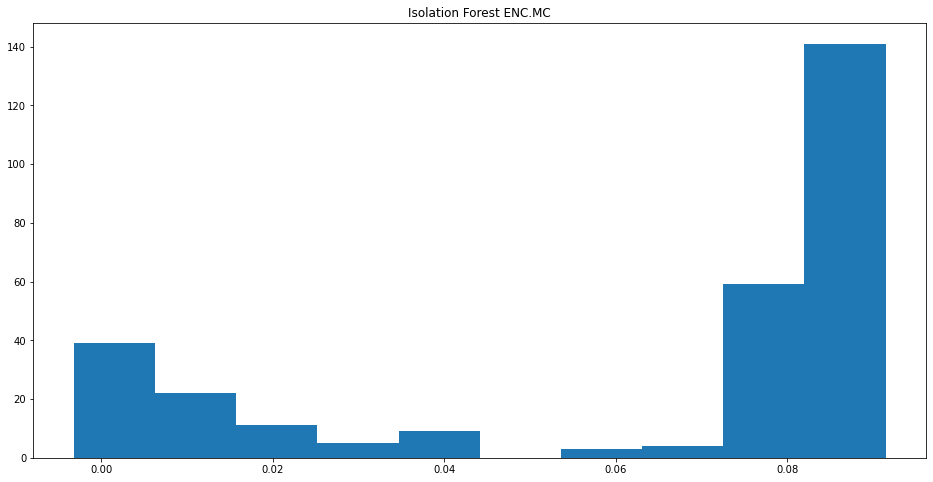

            ENC.MC    scores  anomalia
Date                                  
2019-01-21   6.565 -0.001063        -1
2019-01-22   6.565 -0.001063        -1
2019-01-23   6.635 -0.002128        -1
2019-01-24   6.615 -0.002128        -1
2019-01-25   6.695 -0.002128        -1
2019-01-28   6.620 -0.002128        -1
2019-01-29   6.680 -0.002128        -1
2019-01-30   6.730 -0.002128        -1
2019-01-31   6.775 -0.003196        -1
2019-02-01   6.750 -0.002128        -1
2019-02-04   6.710 -0.002128        -1
2019-02-05   6.695 -0.002128        -1
2019-02-06   6.840 -0.003196        -1
2019-02-07   6.690 -0.002128        -1
2019-02-08   6.560 -0.001063        -1
2019-02-11   6.720 -0.002128        -1
2019-02-12   6.820 -0.003196        -1
2019-02-13   6.865 -0.003196        -1
2019-02-14   6.715 -0.002128        -1
2019-02-15   6.725 -0.002128        -1
2019-02-18   6.890 -0.003196        -1
2019-02-19   6.845 -0.003196        -1
2019-02-20   6.810 -0.003196        -1
2019-02-21   6.840 -0.003

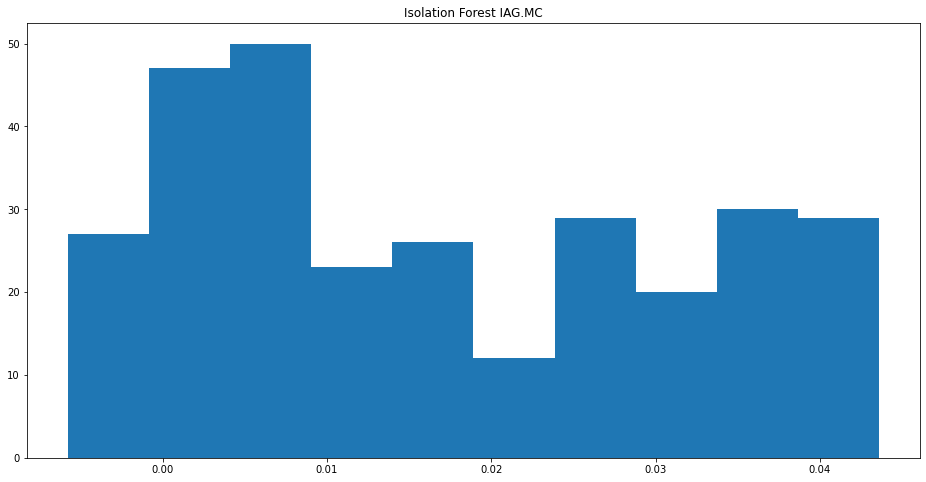

            IAG.MC    scores  anomalia
Date                                  
2019-07-30   4.530 -0.005797        -1
2019-07-31   4.655 -0.001924        -1
2019-08-01   4.562 -0.005797        -1
2019-08-14   4.610 -0.002889        -1
2019-08-15   4.554 -0.005797        -1
2019-08-16   4.616 -0.002889        -1
2019-08-19   4.639 -0.002889        -1
2019-08-20   4.564 -0.005797        -1
2019-08-21   4.605 -0.003856        -1
2019-08-22   4.631 -0.002889        -1
2019-08-23   4.624 -0.002889        -1
2019-08-26   4.576 -0.004825        -1
2019-08-27   4.670 -0.001924        -1
2019-08-28   4.591 -0.003856        -1
2019-08-29   4.681 -0.000961        -1
2019-08-30   4.664 -0.001924        -1
2019-09-02   4.674 -0.000961        -1
2019-09-03   4.607 -0.003856        -1
2019-09-04   4.696 -0.000961        -1
2019-12-16   7.652 -0.001924        -1
2020-01-10   7.784 -0.002889        -1
2020-01-13   7.634 -0.001924        -1
2020-01-17   7.876 -0.003856        -1
2020-01-20   7.706 -0.002

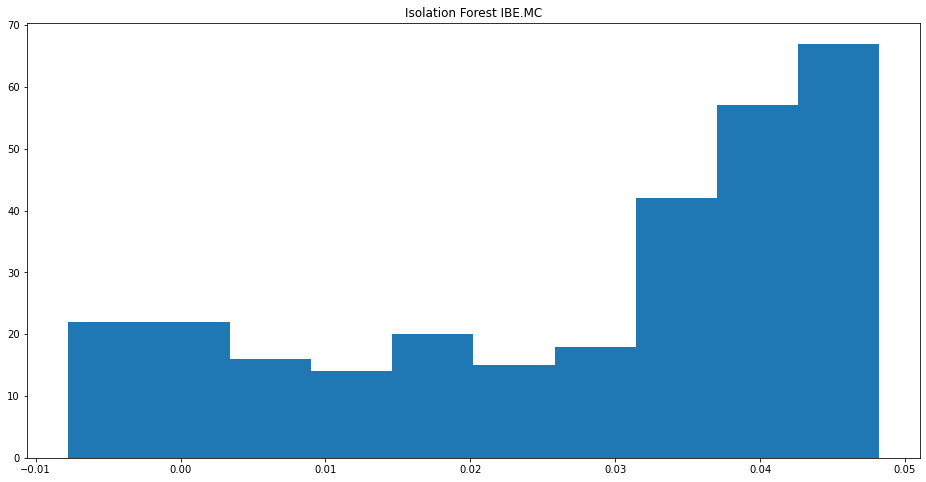

            IBE.MC    scores  anomalia
Date                                  
2019-01-02   6.998 -0.007801        -1
2019-01-03   7.010 -0.007801        -1
2019-01-04   7.062 -0.004859        -1
2019-01-07   7.116 -0.002909        -1
2019-01-08   7.090 -0.003883        -1
2019-01-09   6.864 -0.007801        -1
2019-01-10   6.902 -0.007801        -1
2019-01-11   6.910 -0.007801        -1
2019-01-14   6.878 -0.007801        -1
2019-01-15   6.924 -0.007801        -1
2019-01-16   6.918 -0.007801        -1
2019-01-17   6.950 -0.007801        -1
2019-01-18   7.064 -0.004859        -1
2019-01-21   7.010 -0.007801        -1
2019-01-22   7.048 -0.004859        -1
2019-01-23   7.070 -0.004859        -1
2019-01-24   7.114 -0.002909        -1
2019-01-25   7.072 -0.004859        -1
2019-01-28   7.068 -0.004859        -1
2019-01-29   7.140 -0.002909        -1
2019-01-30   7.108 -0.002909        -1
2019-02-01   7.164 -0.002909        -1
2019-02-04   7.192 -0.000967        -1
2019-02-08   7.182 -0.001

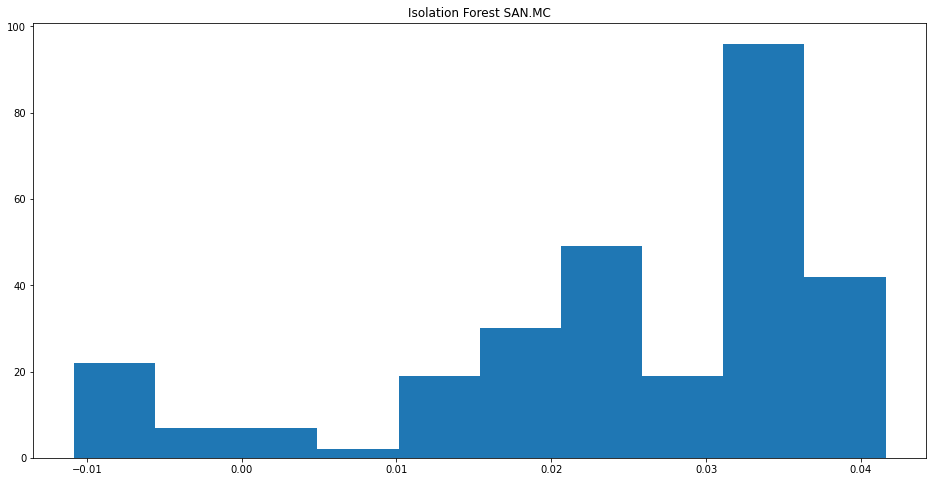

            SAN.MC    scores  anomalia
Date                                  
2019-01-18  4.3555 -0.001950        -1
2019-01-21  4.3450 -0.000974        -1
2019-01-23  4.3550 -0.001950        -1
2019-01-25  4.4180 -0.009841        -1
2019-03-15  4.3815 -0.005878        -1
2019-03-18  4.4285 -0.010838        -1
2019-03-19  4.4855 -0.010838        -1
2019-03-20  4.4230 -0.010838        -1
2019-04-03  4.3640 -0.002929        -1
2019-04-04  4.4070 -0.009841        -1
2019-04-05  4.4020 -0.008847        -1
2019-04-08  4.3910 -0.007855        -1
2019-04-09  4.3785 -0.004892        -1
2019-04-10  4.3710 -0.004892        -1
2019-04-11  4.4770 -0.010838        -1
2019-04-12  4.5590 -0.010838        -1
2019-04-15  4.5600 -0.010838        -1
2019-04-16  4.5715 -0.010838        -1
2019-04-17  4.6185 -0.010838        -1
2019-04-18  4.6090 -0.010838        -1
2019-04-23  4.5475 -0.010838        -1
2019-04-24  4.4755 -0.010838        -1
2019-04-25  4.4835 -0.010838        -1
2019-04-26  4.4880 -0.010

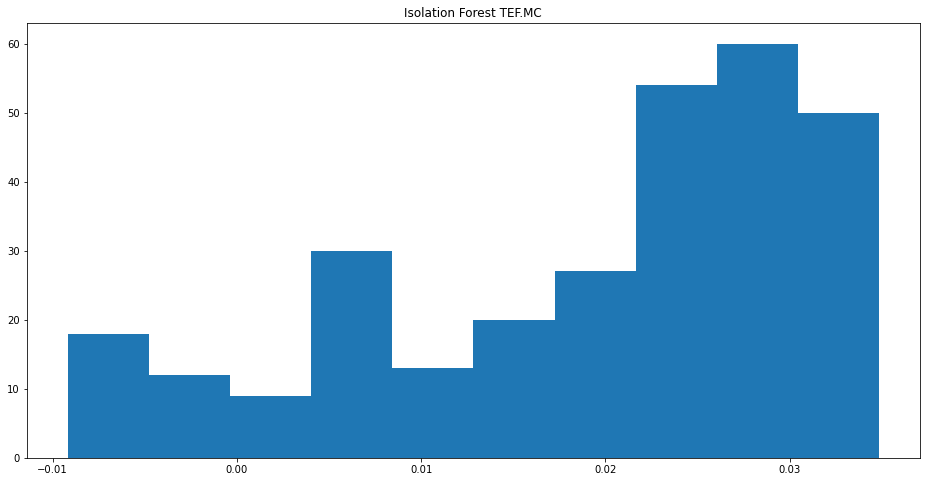

            TEF.MC    scores  anomalia
Date                                  
2019-08-14   5.987 -0.008205        -1
2019-08-15   5.945 -0.009193        -1
2019-08-16   6.006 -0.008205        -1
2019-08-19   6.110 -0.006237        -1
2019-08-20   5.952 -0.009193        -1
2019-08-21   5.972 -0.008205        -1
2019-08-22   5.993 -0.008205        -1
2019-08-23   5.939 -0.009193        -1
2019-08-26   6.057 -0.008205        -1
2019-08-27   6.143 -0.004278        -1
2020-01-08   6.161 -0.002328        -1
2020-01-09   6.181 -0.000386        -1
2020-01-10   6.179 -0.000386        -1
2020-01-13   6.097 -0.006237        -1
2020-01-14   6.066 -0.008205        -1
2020-01-15   6.037 -0.008205        -1
2020-01-16   6.100 -0.006237        -1
2020-01-17   6.150 -0.003302        -1
2020-01-23   6.182 -0.000386        -1
2020-01-24   6.118 -0.005256        -1
2020-01-27   6.042 -0.008205        -1
2020-01-29   6.200 -0.000386        -1
2020-01-30   6.159 -0.002328        -1
2020-01-31   6.109 -0.006

In [40]:
informe_anomalias_if=anomalias_isolation_forest(df_MC,lista_acciones);

In [41]:
# df_MC_IF[~pd.isna(df_MC_IF['anom_if_ENC.MC'])]

In [42]:
#Función que muestra la gráfica de como se situan las anomalías estimadas por Isolation Forest.
# tiene como parámetros el dataframe de datos de cotizaciones
# informe - informe con las anomalias detctadas por IF.
# valores - lista con el nombre de los valores a aanalizar 
def mostrar_outliers_isolation_forest(df,informes_anomalias,valores):
    df_MC_IF=df.copy()
    
    for i,valor in enumerate(valores):
    
        suelo='suelo_'+valor
        techo='techo_'+valor
        anom='anom_'+valor
        anom_if='anom_if_'+valor
        df_MC_IF[anom_if]=np.nan
            
        lista_fechas_anomalias=informes_anomalias[i][valor].index
                    
        valores_anomalias=informes_anomalias[i][valor].values
       
        df_MC_IF.loc[lista_fechas_anomalias,anom_if]=valores_anomalias
        df_MC_IF.loc[:,[valor,anom,anom_if]].plot(linewidth=3, markersize=7).grid('gridOn')
        plt.show()
        
        
    return df_MC_IF

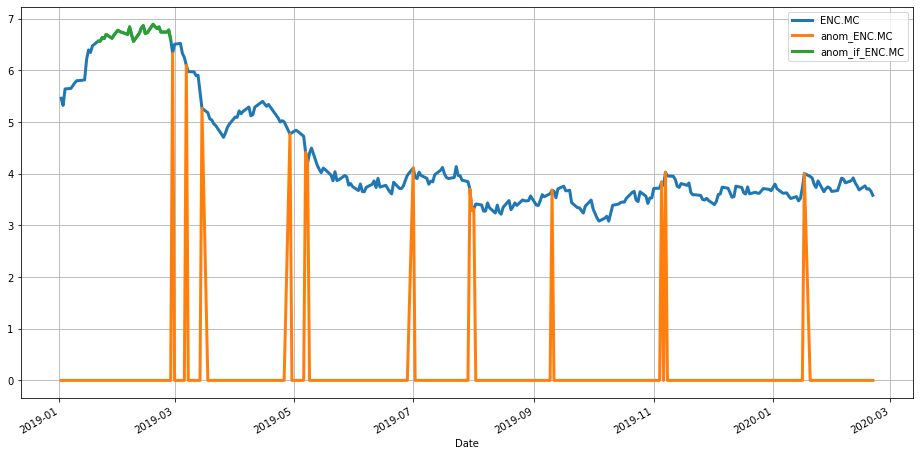

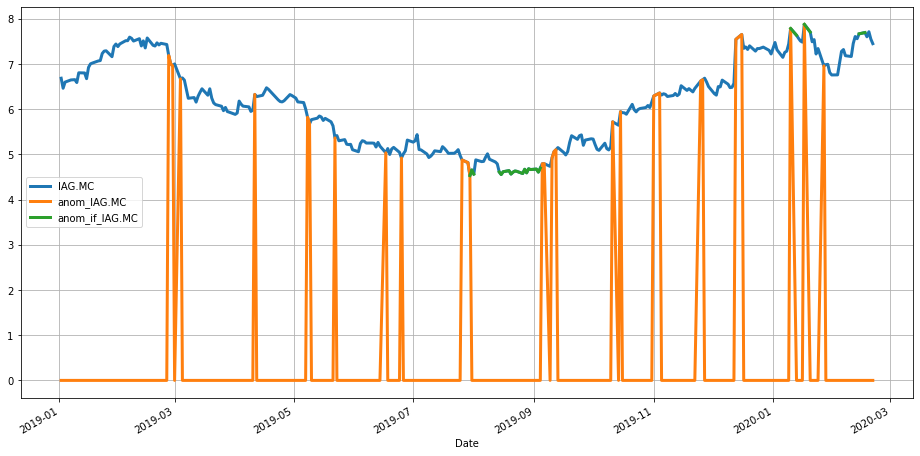

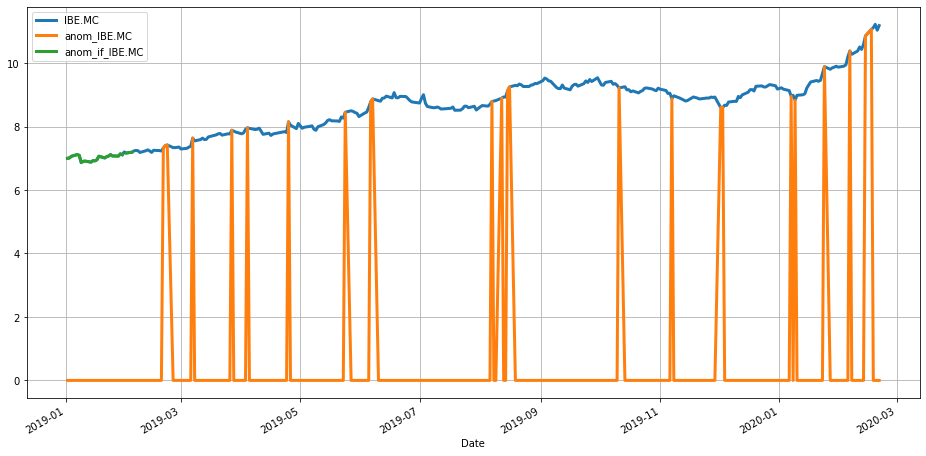

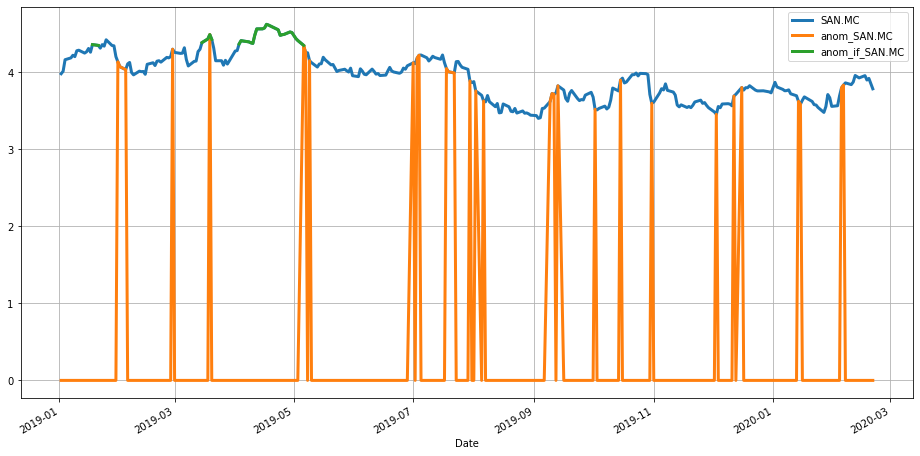

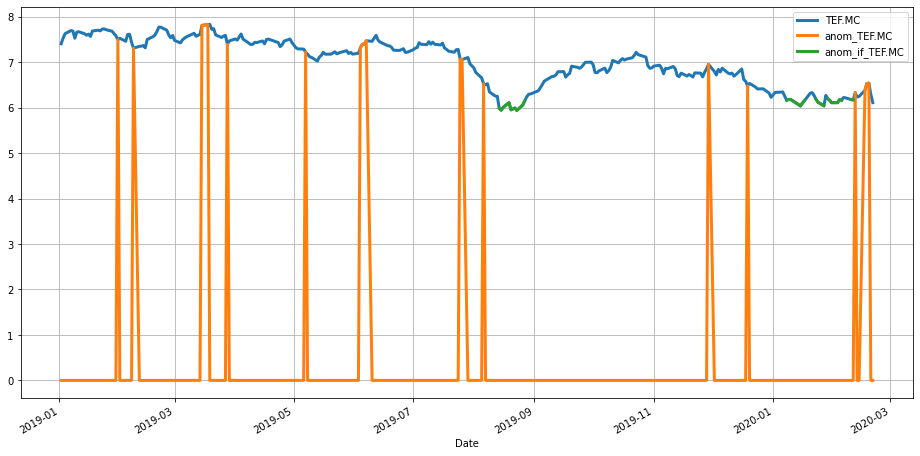

In [43]:
mostrar_outliers_isolation_forest(df_MC,informe_anomalias_if,lista_acciones);

* Las diferencias que observo es que con isolation Forest las anomalías las considera muy continuas en el tiempo a diferencia del método sencillo que están repartidas y son o parecen más puntuales o más aisladas por lo que son  más fácilmente identificable en sus picos por arriba y por abajo
* Como observación comentar que dependiendo del grado de contamianción, que se parametriza en el parámetro **contamination** nos saca más o menos anomalías. Podriamos decir que es equivalente a **sigma** que utilizamos en el método sencillo de detección.